# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: 05.10.2020

Мягкий дедлайн: 01:59MSK 19.10.2020 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 01:59MSK 22.10.2020

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10 + 2 (занимательная арифметика с Дианой)

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — стохастический, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и разобраться как подбирать гиперпараметры для этих методов.

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$ 

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ - это оценка градиента по одному объекту, выбранному случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k}}} \nabla_{w} Q(w_{k}).
$$


Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

**У меня в Юпитере все никак не подгружалась нужная версия sklearn, где есть sklearn.compose... А я уже очень устала, так что пришлось идти на крайние меры... Простите... Я не хотела, честно...**

In [6]:
import numpy as np

s0_default: float = 1
p_default: float = 0.5

batch_size_default: int = 1

alpha_default: float = 0.1
eps_default: float = 1e-8

mu_default = 1e-2

tolerance_default: float = 1e-3
max_iter_default: int = 1000


class BaseDescent:
    def __init__(self):
        self.w = None

    def step(self, X: np.ndarray, y: np.ndarray, iteration: int):
        return self.update_weights(self.calc_gradient(X, y), iteration)

    def update_weights(self, gradient: np.ndarray, iteration: int):
        pass

    def calc_gradient(self, X: np.ndarray, y: np.ndarray):
        pass

class GradientDescent(BaseDescent):
    def __init__(self, w0: np.ndarray, lambda_: float, s0: float = s0_default, p: float = p_default):
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.w = np.copy(w0)

    def update_weights(self, gradient: np.ndarray, iteration: int):
        self.w = self.w - self.eta(iteration) * gradient
        return self.eta(iteration) * gradient

    def calc_gradient(self, X: np.ndarray, y: np.ndarray):
        return 2 * np.dot(X.T, (np.dot(X, self.w) - y)) / y.shape[0]

class StochasticDescent(BaseDescent):
    def __init__(self, w0: np.ndarray, lambda_: float, s0: float = s0_default, p: float = p_default,
                 batch_size: int = batch_size_default):
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.batch_size = batch_size
        self.w = np.copy(w0)

    def update_weights(self, gradient: np.ndarray, iteration: int):
        self.w = self.w - self.eta(iteration) * gradient
        return self.eta(iteration) * gradient

    def calc_gradient(self, X: np.ndarray, y: np.ndarray):
        els = np.random.randint(low=0, high=X.shape[0], size=self.batch_size)  #выбираем batch_size случайных компонент
        return  2 * np.dot(X[els].T, (np.dot(X[els], self.w) - y[els])) / self.batch_size


class MomentumDescent(BaseDescent):
    def __init__(self, w0: np.ndarray, lambda_: float, alpha: float = alpha_default, s0: float = s0_default,
                 p: float = p_default):
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.alpha = alpha
        self.w = np.copy(w0)
        self.h = 0

    def update_weights(self, gradient: np.ndarray, iteration: int):
        self.h = self.alpha * self.h + self.eta(iteration) * gradient
        self.w = self.w - self.h
        return self.h

    def calc_gradient(self, X: np.ndarray, y: np.ndarray):
        return 2 * np.dot(X.T, (np.dot(X, self.w) - y)) / y.shape[0]


class Adagrad(BaseDescent):
    def __init__(self, w0: np.ndarray, lambda_: float, eps: float = eps_default, s0: float = s0_default,
                 p: float = p_default):
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.eps = eps
        self.w = np.copy(w0)
        self.g = 0

    def update_weights(self, gradient: np.ndarray, iteration: int):
        self.g = self.g + np.square(gradient)
        self.w = self.w - (self.eta(iteration) * gradient / np.sqrt(self.eps + self.g))
        return self.eta(iteration) * gradient / np.sqrt(self.eps + self.g)

    def calc_gradient(self, X: np.ndarray, y: np.ndarray):
        return 2 * np.dot(X.T, (np.dot(X, self.w) - y)) / y.shape[0]

## Задание 2. Реализация линейной регресии (1.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` - **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами python допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Евклидова норма разности весов на двух соседних итерациях меньше `tolerance`.
    * Достижение максимального числа итераций `max_iter`.
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь для каждой итерации, начиная с нулевой (до первого шага).
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed).

In [3]:
class LinearRegression:
    def __init__(self, descent, tolerance: float = tolerance_default, max_iter: int = max_iter_default):
        self.descent = descent
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.loss_history = []

    def fit(self, X: np.ndarray, y: np.ndarray):
        iter = 0
        while iter < self.max_iter:
            self.calc_loss(X, y)
            diff = self.descent.step(X, y, iter)
            if np.square(np.linalg.norm(diff)) < self.tolerance:
                break
            iter += 1

        return self

    def predict(self, X: np.ndarray):
        return X.dot(self.descent.w)

    def calc_loss(self, X: np.ndarray, y: np.ndarray):
        pred = self.predict(X)
        loss = np.sum(np.square(pred - y)) / y.shape[0]
        self.loss_history.append(loss)

## Задание 3. Проверка кода (0 баллов)

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import  matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0

In [8]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [9]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [10]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [12]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [13]:
# LinearRegression

regression = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 2),
    tolerance = tolerance,
    max_iter = max_iter
)

regression.fit(X, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

prediction = regression.predict(X)

assert prediction.shape[0] == num_objects, 'Predict failed'

Если ваше решение прошло все тесты локально, то теперь осталось протестировать его в Яндекс Контесте - **https://contest.yandex.ru/contest/19551**.

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **GradientDescent**:  https://contest.yandex.ru/contest/19551/run-report/36918077/
* **StochasticDescent**: https://contest.yandex.ru/contest/19551/run-report/36918092/
* **MomentumDescent**: https://contest.yandex.ru/contest/19551/run-report/36918103/
* **Adagrad**: https://contest.yandex.ru/contest/19551/run-report/36918124/
* **LinearRegression**: https://contest.yandex.ru/contest/19551/run-report/36918130/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.
Для дальнейшей работы сделайте следующее:
* Проведите разумную предобработку данных.
* Замените целевую переменную на её логарифм.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1.

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
# Посмотрим, как вообще выглядят данные
df = pd.read_csv('/content/gdrive/My Drive/autos.csv')

In [13]:
df

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,2001,6,2016-03-17 00:00:00,2016-03-17 17:40:17,91074,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,2008,7,2016-03-31 00:00:00,2016-04-06 10:17:21,60437,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,1995,10,2016-04-04 00:00:00,2016-04-06 19:17:07,33775,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,2004,8,2016-04-01 00:00:00,2016-04-05 18:18:39,67112,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,2004,12,2016-03-26 00:00:00,2016-04-06 10:45:34,96224,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247867,bmw,3er,kombi,manuell,diesel,nein,3,150000,2005,5,2016-04-02 00:00:00,2016-04-06 20:47:12,81825,3999
247868,seat,leon,limousine,manuell,benzin,ja,225,150000,2004,5,2016-03-19 00:00:00,2016-03-19 20:44:43,96465,3200
247869,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,2000,3,2016-03-05 00:00:00,2016-03-11 18:17:12,26135,1199
247870,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,1996,3,2016-03-19 00:00:00,2016-04-07 07:15:26,87439,9200


Для начала посмотрим, есть ли в данных пропуски.

(Заранее извиняюсь за все действия, которые я буду делать в этом блоке... У меня после дз по рядам (курс по выбору) плохая привычка чекать данные на самые тупые штуки - опечатки, пробелы в названии столбцов (ой, что мы только не пережили на рядах, конечно...))

In [ ]:
df.isnull().sum()

brand                  0
model                  0
vehicleType            0
gearbox                0
fuelType               0
notRepairedDamage      0
powerPS                0
kilometer              0
yearOfRegistration     0
monthOfRegistration    0
dateCreated            0
lastSeen               0
postalCode             0
price                  0
dtype: int64

Пропусков нет, уже неплохо!

Теперь рассмотрим уникальные значения (в тех столбцах, в которых это разумно делать) и проверим таким образом данные на наличие опечаток

In [ ]:
df.groupby(by='gearbox').count()['brand']

gearbox
automatik     58300
manuell      189572
Name: brand, dtype: int64

In [ ]:
df.groupby('fuelType').count()['brand']

fuelType
andere         53
benzin     159581
cng           429
diesel      83841
elektro        52
hybrid        198
lpg          3718
Name: brand, dtype: int64

In [ ]:
df.groupby('notRepairedDamage').count()['brand']

notRepairedDamage
ja       24607
nein    223265
Name: brand, dtype: int64

In [ ]:
df.groupby('monthOfRegistration').count()['brand']

monthOfRegistration
0      5642
1     17735
2     16498
3     26936
4     22510
5     21970
6     23776
7     20720
8     17079
9     18448
10    19877
11    18460
12    18221
Name: brand, dtype: int64

Опа! А вот и проблемы. Не то, чтобы я эксперт, но кажется 13 месяцев - не ок...
Кажется, месяц регистрации не должен сильно влиять на цену, так что поставим вместо 0 месяца (считаем неверным именно его, так как данных с таким месяцем меньше всего) какой-то рандомный.

In [9]:
df.loc[df['monthOfRegistration'] == 0,
       'monthOfRegistration'] = np.random.randint(1, 13, df.loc[df['monthOfRegistration'] == 0,
                                                                'monthOfRegistration'].shape[0])

Как мне кажется цена меньше 100 - тоже не ок, так что удалим такие данные.


In [10]:
df = df.loc[df['price'] > 100]

Опять таки, я, конечно, не мастер, но кажется, машины мощностью меньше 20 лошадиных сил - странная штука...

(Я нашла такое: https://1gai.ru/blog/cars/513900-desyat-samyh-malomoschnyh-avtomobiley.html но что-то я не думаю, что в нашем списке такие "машины" есть...)

In [11]:
df = df.loc[df['powerPS'] > 20]

Кажется, дата создания объявление, дата последне визита на сайт и почтовый индекс - очень сорно влияют на цену авто. Выкинем их.

In [12]:
df = df.drop(columns=['postalCode', 'dateCreated', 'lastSeen'])

Теперь преобразуем таргет.

In [13]:
df['log_price'] = np.log1p(df['price'])
df = df.drop(columns=['price'])

Ну и наконец разобьем выборку.

In [14]:
y = df['log_price']
X = df.drop(columns='log_price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (1.5 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и R^2 на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (0.5 балла)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

In [15]:
# Как-то библиотечная R^2 меня подвела... Ну, я не гордая, напишу свою

def R2(y_test, y_pred):
    err = np.sum(np.square(y_test - y_pred))
    mean_err = np.sum(np.square(y_test - y_test.mean()))
    return 1 - (err / mean_err)

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [17]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'monthOfRegistration', 'yearOfRegistration']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

new_X_train = column_transformer.fit_transform(X_train).toarray()
new_X_test = column_transformer.transform(X_test).toarray()
new_X_valid = column_transformer.transform(X_valid).toarray()

w0 = np.zeros(new_X_train.shape[1])

lambdas = np.logspace(0.1, 1/2, 15)

In [18]:
f_b_l = -3
f_b_e = 1e10
for el in lambdas:
    f_model = LinearRegression(descent = GradientDescent(lambda_ = el, w0 = w0))
    f_model.fit(new_X_train, y_train.values)
    f_pred = f_model.predict(new_X_valid)
    cur_e = mean_squared_error(y_valid, f_pred)
    print("Для lambda =", el, " MSE =", cur_e)
    if cur_e < f_b_e:
        f_b_e = cur_e
        f_b_l = el

print('Лучшая lambda для GradientDescent =', f_b_l)

Для lambda = 1.2589254117941673  MSE = 0.3851151913778369
Для lambda = 1.344532884299761  MSE = 0.37591732460943694
Для lambda = 1.4359617019622146  MSE = 0.3672407150794298
Для lambda = 1.5336077187700117  MSE = 0.3599781217330555
Для lambda = 1.6378937069540642  MSE = 0.353718736142671
Для lambda = 1.7492711874398423  MSE = 0.34778149692698646
Для lambda = 1.868222384771037  MSE = 0.3421337585883956
Для lambda = 1.9952623149688797  MSE = 0.33744744579920066
Для lambda = 2.130941015366797  MSE = 0.33273522891175605
Для lambda = 2.2758459260747887  MSE = 0.3290018949585019
Для lambda = 2.4306044333844095  MSE = 0.3253729961929142
Для lambda = 2.5958865861263947  MSE = 0.32180272615843514
Для lambda = 2.7724079967417743  MSE = 0.4388016516494339
Для lambda = 2.9609329396270834  MSE = 40.92949448583809
Для lambda = 3.1622776601683795  MSE = 30063671.497836158
Лучшая lambda для GradientDescent = 2.5958865861263947


In [144]:
lambdas = np.logspace(-2, -0.1, 10)

In [146]:
s_b_l = -3
s_b_e = 1e10
for el in lambdas:
    s_model = LinearRegression(descent = StochasticDescent(lambda_ = el, w0 = w0))
    s_model.fit(new_X_train, y_train.values)
    s_pred = s_model.predict(new_X_valid)
    cur_e = mean_squared_error(y_valid, s_pred)
    print("Для lambda =", el, " MSE =", cur_e)
    if cur_e < s_b_e:
        s_b_e = cur_e
        s_b_l = el

print('Лучшая lambda для StochastiDescent =', s_b_l)

Для lambda = 0.01  MSE = 24.203439364208165
Для lambda = 0.01625964693881481  MSE = 36.17038807202997
Для lambda = 0.026437611857490998  MSE = 11.405756307188062
Для lambda = 0.042986623470822764  MSE = 12.394435241499504
Для lambda = 0.06989473207273486  MSE = 6.948952708483126
Для lambda = 0.11364636663857249  MSE = 3.859634727501246
Для lambda = 0.18478497974222907  MSE = 9.451988265811163
Для lambda = 0.30045385302046934  MSE = 16.95781737838567
Для lambda = 0.4885273571519389  MSE = 3381.6415111793635
Для lambda = 0.7943282347242815  MSE = 772056.570397085
Лучшая lambda для StochastiDescent = 0.11364636663857249


In [147]:
lambdas = np.logspace(0.1, 1/2, 15)

In [148]:
m_b_l = -3
m_b_e = 1e10
for el in lambdas:
    m_model = LinearRegression(descent = MomentumDescent(lambda_ = el, w0 = w0))
    m_model.fit(new_X_train, y_train.values)
    m_pred = m_model.predict(new_X_valid)
    cur_e = mean_squared_error(y_valid, m_pred)
    print("Для lambda =", el, " MSE =", cur_e)
    if cur_e < m_b_e:
        m_b_e = cur_e
        m_b_l = el

print('Лучшая lambda для MomentumDescent =', m_b_l)

Для lambda = 1.2589254117941673  MSE = 0.39026846878406085
Для lambda = 1.344532884299761  MSE = 0.38233619858968043
Для lambda = 1.4359617019622146  MSE = 0.3676773171135944
Для lambda = 1.5336077187700117  MSE = 0.3616376271650663
Для lambda = 1.6378937069540642  MSE = 0.3545333201247479
Для lambda = 1.7492711874398423  MSE = 0.4313127653468186
Для lambda = 1.868222384771037  MSE = 0.3437460976319326
Для lambda = 1.9952623149688797  MSE = 0.33896228592112077
Для lambda = 2.130941015366797  MSE = 0.3338699794676587
Для lambda = 2.2758459260747887  MSE = 0.32963521842677185
Для lambda = 2.4306044333844095  MSE = 0.32661609804388175
Для lambda = 2.5958865861263947  MSE = 0.32290235862918526
Для lambda = 2.7724079967417743  MSE = 0.3209787962170847
Для lambda = 2.9609329396270834  MSE = 0.43680066062956774
Для lambda = 3.1622776601683795  MSE = 275.1704386323614
Лучшая lambda для MomentumDescent = 2.7724079967417743


In [149]:
a_b_l = -3
a_b_e = 1e10
for el in lambdas:
    a_model = LinearRegression(descent = Adagrad(lambda_ = el, w0 = w0))
    a_model.fit(new_X_train, y_train.values)
    a_pred = a_model.predict(new_X_valid)
    cur_e = mean_squared_error(y_valid, a_pred)
    print("Для lambda =", el, " MSE =", cur_e)
    if cur_e < a_b_e:
        a_b_e = cur_e
        a_b_l = el

print('Лучшая lambda для Adagrad =', a_b_l)

Для lambda = 1.2589254117941673  MSE = 0.3006173967170282
Для lambda = 1.344532884299761  MSE = 0.29952696271410156
Для lambda = 1.4359617019622146  MSE = 0.29868280280374626
Для lambda = 1.5336077187700117  MSE = 0.29827871855195
Для lambda = 1.6378937069540642  MSE = 0.29755802331485454
Для lambda = 1.7492711874398423  MSE = 0.2972114160996671
Для lambda = 1.868222384771037  MSE = 0.2969760166950352
Для lambda = 1.9952623149688797  MSE = 0.29683355928698396
Для lambda = 2.130941015366797  MSE = 0.2967690781028956
Для lambda = 2.2758459260747887  MSE = 0.29656349607786275
Для lambda = 2.4306044333844095  MSE = 0.29661550389239344
Для lambda = 2.5958865861263947  MSE = 0.2965084563872326
Для lambda = 2.7724079967417743  MSE = 0.2966356811967455
Для lambda = 2.9609329396270834  MSE = 0.2967920275446493
Для lambda = 3.1622776601683795  MSE = 0.2967645831311482
Лучшая lambda для Adagrad = 2.5958865861263947


In [252]:
f_model = LinearRegression(descent = GradientDescent(lambda_ = f_b_l, w0 = w0))
f_model.fit(new_X_train, y_train.values)
f_pred_tr = f_model.predict(new_X_train)
f_pred_te = f_model.predict(new_X_test)

s_model = LinearRegression(descent = StochasticDescent(lambda_ = s_b_l, w0 = w0))
s_model.fit(new_X_train, y_train.values)
s_pred_tr = s_model.predict(new_X_train)
s_pred_te = s_model.predict(new_X_test)

m_model = LinearRegression(descent = MomentumDescent(lambda_ = m_b_l, w0 = w0))
m_model.fit(new_X_train, y_train.values)
m_pred_tr = m_model.predict(new_X_train)
m_pred_te = m_model.predict(new_X_test)

a_model = LinearRegression(descent = Adagrad(lambda_ = a_b_l, w0 = w0))
a_model.fit(new_X_train, y_train.values)
a_pred_tr = a_model.predict(new_X_train)
_pred_te = a_model.predict(new_X_test)

In [253]:
print("Значение MSE на тестовой выборке для Gradient descent с наилучшим lambda = %.4f" % mean_squared_error(f_pred_te, y_test))
print("Значение MSE на тестовой выборке для Stochastic descent с наилучшим lambda = %.4f" % mean_squared_error(s_pred_te, y_test))
print("Значение MSE на тестовой выборке для Momentum descent с наилучшим lambda = %.4f" % mean_squared_error(m_pred_te, y_test))
print("Значение MSE на тестовой выборке для Adagrad с наилучшим lambda = %.4f" % mean_squared_error(a_pred_te, y_test))

print("Значение MSE на обучающей выборке для Gradient descent с наилучшим lambda = %.4f" % mean_squared_error(f_pred_tr, y_train))
print("Значение MSE на обучающей выборке для Stochastic descent с наилучшим lambda = %.4f" % mean_squared_error(s_pred_tr, y_train))
print("Значение MSE на обучающей выборке для Momentum descent с наилучшим lambda = %.4f" % mean_squared_error(m_pred_tr, y_train))
print("Значение MSE на обучающей выборке для Adagrad с наилучшим lambda = %.4f" % mean_squared_error(a_pred_tr, y_train))

print()

print("Значение R2 на тестовой выборке для Gradient descent с наилучшим lambda = %.4f" % R2(y_test, f_pred_te))
print("Значение R2 на тестовой выборке для Stochastic descent с наилучшим lambda = %.4f" % R2(y_test, s_pred_te))
print("Значение R2 на тестовой выборке для Momentum descent с наилучшим lambda = %.4f" % R2(y_test, m_pred_te))
print("Значение R2 на тестовой выборке для Adagrad с наилучшим lambda = %.4f" % R2(y_test, a_pred_te))

print("Значение R2 на обучающей выборке для Gradient descent с наилучшим lambda = %.4f" % R2(y_train, f_pred_tr))
print("Значение R2 на обучающей выборке для Stochastic descent с наилучшим lambda = %.4f" % R2(y_train, s_pred_tr))
print("Значение R2 на обучающей выборке для Momentum descent с наилучшим lambda = %.4f" % R2(y_train, m_pred_tr))
print("Значение R2 на обучающей выборке для Adagrad с наилучшим lambda = %.4f" % R2(y_train, a_pred_tr))

Значение MSE на тестовой выборке для Gradient descent с наилучшим lambda = 0.3343
Значение MSE на тестовой выборке для Stochastic descent с наилучшим lambda = 10.0553
Значение MSE на тестовой выборке для Momentum descent с наилучшим lambda = 0.3324
Значение MSE на тестовой выборке для Adagrad с наилучшим lambda = 0.3043
Значение MSE на обучающей выборке для Gradient descent с наилучшим lambda = 0.3264
Значение MSE на обучающей выборке для Stochastic descent с наилучшим lambda = 10.2178
Значение MSE на обучающей выборке для Momentum descent с наилучшим lambda = 0.3247
Значение MSE на обучающей выборке для Adagrad с наилучшим lambda = 0.2991

Значение R2 на тестовой выборке для Gradient descent с наилучшим lambda = 0.7371
Значение R2 на тестовой выборке для Stochastic descent с наилучшим lambda = -6.9095
Значение R2 на тестовой выборке для Momentum descent с наилучшим lambda = 0.7385
Значение R2 на тестовой выборке для Adagrad с наилучшим lambda = 0.7606
Значение R2 на обучающей выборке 

Так, ну качество получилось лучше всего у Adagrad. И на обучающей, и на тестовой выборке.

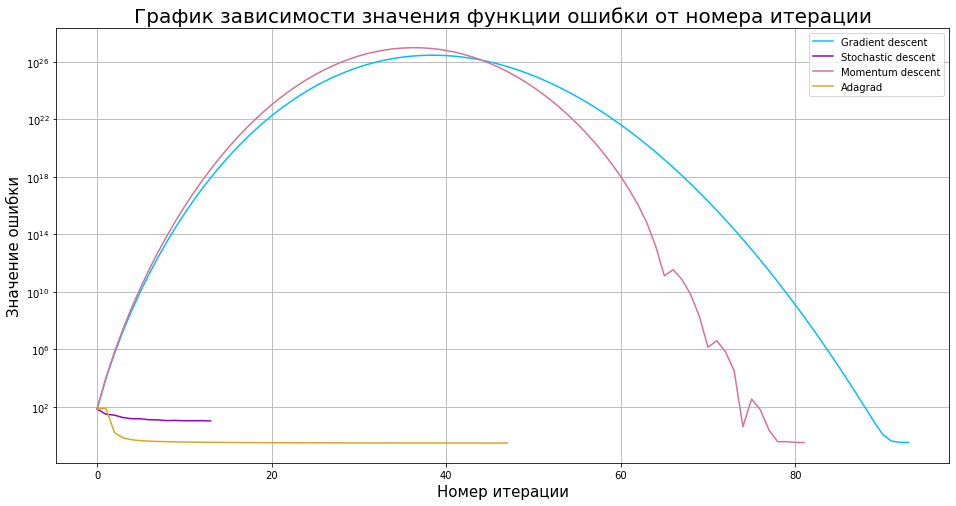

In [254]:
plt.figure(figsize=(16,8))
plt.title('График зависимости значения функции ошибки от номера итерации', size=20)
plt.ylabel('Значение ошибки', size=15)
plt.xlabel('Номер итерации', size=15)

plt.plot(f_model.loss_history, label='Gradient descent', color='deepskyblue')
plt.plot(s_model.loss_history, label='Stochastic descent', color='darkviolet')
plt.plot(m_model.loss_history, label='Momentum descent', color='palevioletred')
plt.plot(a_model.loss_history, label='Adagrad', color='goldenrod')

plt.yscale('log')  # иначе все выглядит отвратительно...
plt.grid()
plt.legend()
plt.show()

In [255]:
print('Количество итераций до сходимости Gradient descent', len(f_model.loss_history))
print('Количество итераций до сходимости Stochastic descent', len(s_model.loss_history))
print('Количество итераций до сходимости Momentum descent', len(m_model.loss_history))
print('Количество итераций до сходимости Adagrad', len(a_model.loss_history))

Количество итераций до сходимости Gradient descent 94
Количество итераций до сходимости Stochastic descent 14
Количество итераций до сходимости Momentum descent 82
Количество итераций до сходимости Adagrad 48



Как можно заметить, наименьшее количество итераций до сходимости получилось у Стохастического градиентного спуска, а именно 14 (хотя  тут, конечно, раз на раз не приходится...).

Затем за 48 сходится Adagrad, следующим за 82 итерации сходится Momentum. И аутсайдером в нашей гонке сходимостей является Полный градиентый спуск, который довольно грустно сходится за 94 итерации. Все это вполне себе объяснимо порядками сходимостей градиентных спусков, о которых говорилось на лекции.

## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

Возьму k = 10.

In [41]:
import time

In [267]:
batch_sizes = np.arange(5, 500, 10)

mean_time = []
mean_it = []
var_time = []
var_it = []

for el in batch_sizes:
    cur_it = []
    cur_time = []
    for i in range(10):
        s_model = LinearRegression(descent = StochasticDescent(batch_size = el, lambda_ =  s_b_l, w0 = w0))
        start_time = time.time()
        s_model.fit(new_X_train, y_train.values)
        s_pred = s_model.predict(new_X_test)
        c_time = time.time() - start_time
        cur_time.append(c_time)
        cur_it.append(len(s_model.loss_history))

    mean_it.append(np.mean(cur_it))
    mean_time.append(np.mean(cur_time))
    var_it.append(np.var(cur_it))
    var_time.append(np.var(cur_time))


Помимо графиков средних значений нарисую еще и графики  дисперсий (я что, блин, зря их считала?!)

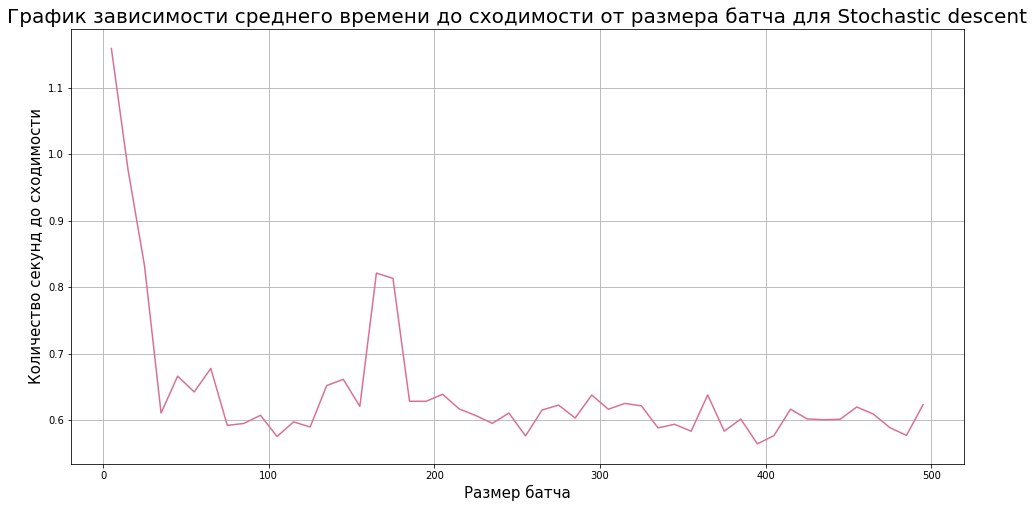

In [268]:
plt.figure(figsize=(16,8))
plt.title('График зависимости среднего времени до сходимости от размера батча для Stochastic descent', size=20)
plt.xlabel('Размер батча', size=15)
plt.ylabel('Количество секунд до сходимости', size=15)

plt.plot(batch_sizes, mean_time, color='palevioletred')
plt.grid()
plt.show()

Какой-то ничем не объяснимый скачок в середине... Ну, такое в жизни случается. Не переживаем.

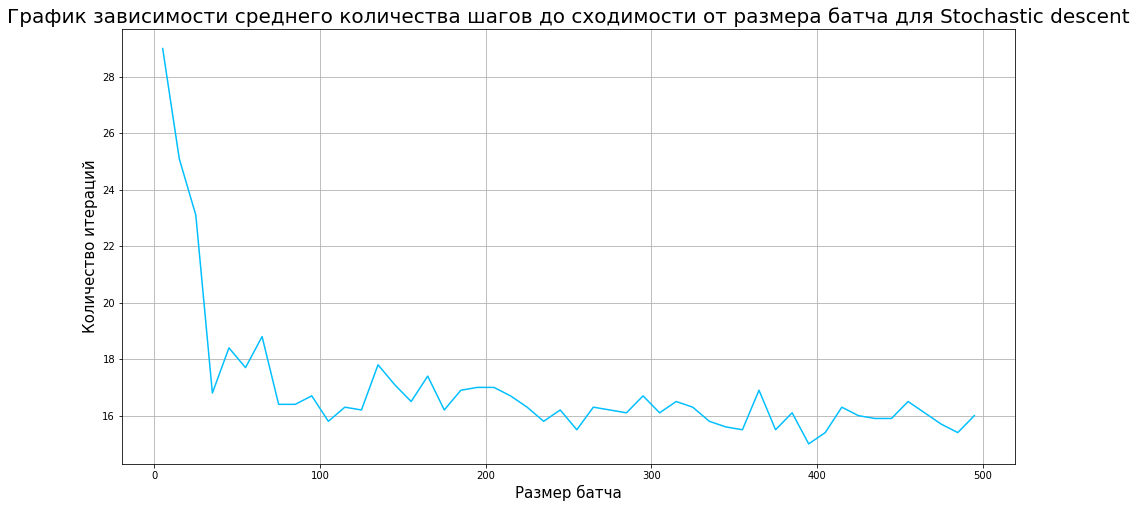

In [269]:
plt.figure(figsize=(16,8))
plt.title('График зависимости среднего количества шагов до сходимости от размера батча для Stochastic descent', size=20)
plt.xlabel('Размер батча', size=15)
plt.ylabel('Количество итераций', size=15)

plt.plot(batch_sizes, mean_it, color='deepskyblue') 
plt.grid()
plt.show()

Так, ну мы можем заметить, что количество времени и шагов для сходимости в среднем немного меньше для batch size от 200. Больше это, конечно, заметно по количеству итераций до сходимости. Что в приниципе вполне себе объяснимо, ведь при маленьком batc_size мы расматриваем небольшое количество случайных слагаемых, которым оцениванем градиент, таким образом точность оценки будет не очень высокой, а значит и сходимость будет занимать больше шагов. А при большом batch_size количество слагаемых увеличивается, значит точность оценки градиента тоже увеличивается, а значит сходимость происходит быстрее. 

Но при этом можно заметить, что при batch_size от 200 до 500 особой разницы в скорости сходимости не наблюдается.

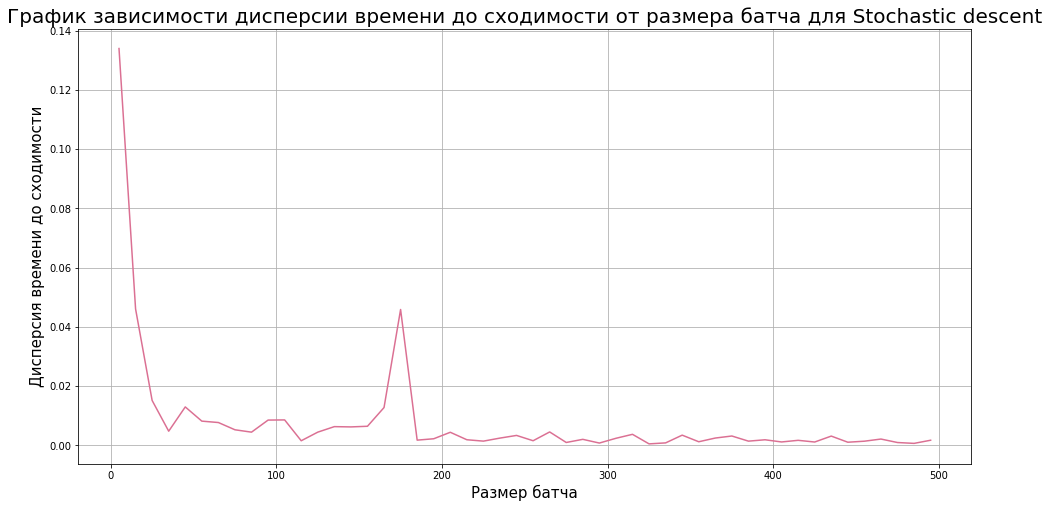

In [270]:
plt.figure(figsize=(16,8))
plt.title('График зависимости дисперсии времени до сходимости от размера батча для Stochastic descent', size=20)
plt.xlabel('Размер батча', size=15)
plt.ylabel('Дисперсия времени до сходимости', size=15)

plt.plot(batch_sizes, var_time, color='palevioletred')
plt.grid()
plt.show()

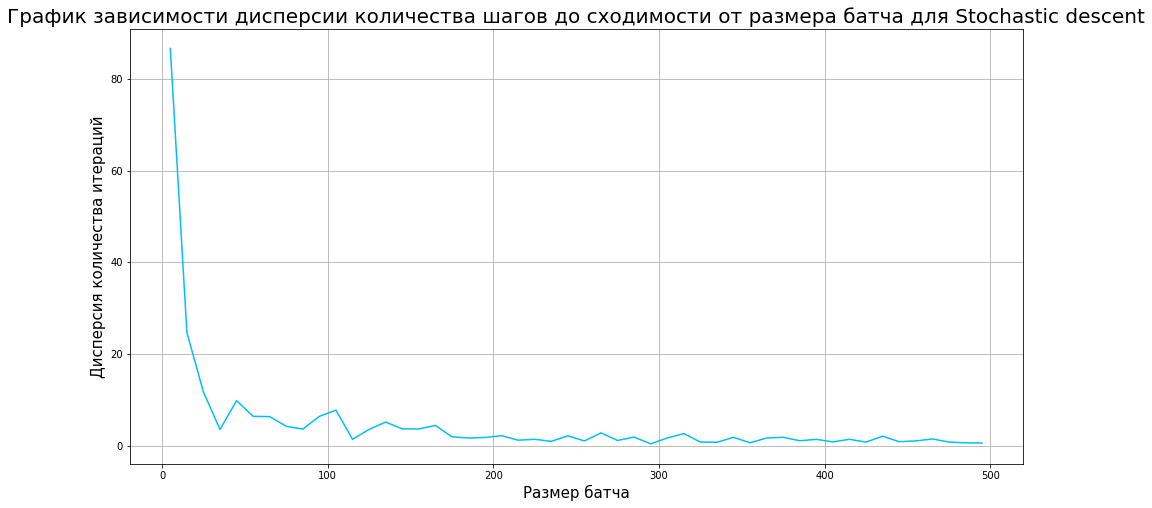

In [271]:
plt.figure(figsize=(16,8))
plt.title('График зависимости дисперсии количества шагов до сходимости от размера батча для Stochastic descent', size=20)
plt.xlabel('Размер батча', size=15)
plt.ylabel('Дисперсия количества итераций', size=15)

plt.plot(batch_sizes, var_it, color='deepskyblue')
plt.grid()
plt.show()

Как можно заметить, для размера батча $\geq$ 200 дисперсия времени и количества итераций до сходимости является мочти нулевой. Это значит, что градиентный супуск работает более стабильно и нет сильного разброса в количестве итераций или времени до сходимости в зависимости от запуска линейной регрессии (то есть по сути от выбора случайных компонент).

Так что кажется, если мы хотим получить более стабильную и немного более быструю сходимость (имею ввиду по числу операций или времени), то стоит выбирать довольно большой batch size. Но при этом стоит понимать, что при увеличении размера батча увеличивается и количество необходимой для вычислений памяти (так как нам нужно держать в памяти больше объектов выборки на каждом шаге).

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. (Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов). Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$ Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2 $$

Допишите классы **GradientDescentReg**, **StochasticDescentReg**, **MomentumDescentReg**, **AdagradReg** в файле `utils.py`. Мы будем использовать тот же самый класс для линейной регрессии, так как для сравнения методов с регуляризацией и без неё нам нужна только MSE часть функции потерь.

Найдите по валидационной выборке лучшие параметры обучения с регуляризацией. Сравните для каждого метода результаты на тестовой выборке по метрикам MSE и R^2 с регуляризацией и без регуляризации. Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации.

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Чем вы можете объяснить это?

Так, ну нас тут снова застала невозможность работать в коллабе с внешним файлом.... Так что как-то так.

In [82]:
class GradientDescentReg(GradientDescent):
    def __init__(self, w0: np.ndarray, lambda_: float, mu: float = mu_default, s0: float = s0_default,
                 p: float = p_default):
        super().__init__(w0=w0, lambda_=lambda_, s0=s0, p=p)
        self.mu = mu

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        return super().update_weights(gradient, iteration)

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        l2 = self.w  # градиент от np.linalg.norm(w)**2 / 2 = 2w / 2 = w
        return super().calc_gradient(X, y) + l2 * self.mu


class StochasticDescentReg(StochasticDescent):
    def __init__(self, w0: np.ndarray, lambda_: float, mu: float = mu_default, s0: float = s0_default,
                 p: float = p_default, batch_size: int = batch_size_default):
        super().__init__(w0=w0, lambda_=lambda_, s0=s0, p=p, batch_size=batch_size)
        self.mu = mu

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        return super().update_weights(gradient, iteration)

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        l2 = self.w
        return super().calc_gradient(X, y) + l2 * self.mu


class MomentumDescentReg(MomentumDescent):
    def __init__(self, w0: np.ndarray, lambda_: float, alpha: float = alpha_default, mu: float = mu_default,
                 s0: float = s0_default, p: float = p_default):
        super().__init__(w0=w0, lambda_=lambda_, alpha=alpha, s0=s0, p=p)
        self.mu = mu

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        return super().update_weights(gradient, iteration)

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        l2 = self.w
        return super().calc_gradient(X, y) + l2 * self.mu


class AdagradReg(Adagrad):
    def __init__(self, w0: np.ndarray, lambda_: float, eps: float = eps_default, mu: float = mu_default,
                 s0: float = s0_default, p: float = p_default):
        super().__init__(w0=w0, lambda_=lambda_, eps=eps, s0=s0, p=p)
        self.mu = mu

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        return super().update_weights(gradient, iteration)

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        l2 = self.w
        return super().calc_gradient(X, y) + l2 * self.mu

Мой ноут бы окончательно умер, если бы я запустила двойной цикл для подбора и $\lambda$ и $\mu$, так что зафиксируем $\lambda$ как лучшее для модели без регуляризации и будет (пытаться не умереть) подбирать только $\mu$.

In [272]:
mu = np.logspace(-10, -0.1, 5)

In [173]:
fr_b_l = -3
fr_b_e = 1e10
for el in mu:
    fr_model = LinearRegression(descent = GradientDescentReg(lambda_ = f_b_l, w0 = w0, mu = el))
    fr_model.fit(new_X_train, y_train.values)
    fr_pred = fr_model.predict(new_X_valid)
    cur_e = mean_squared_error(y_valid, fr_pred)
    print("Для lambda =", el, " MSE =", cur_e)
    if cur_e <= fr_b_e:
        fr_b_e = cur_e
        fr_b_l = el

print('Лучшая mu для GradientDescentReg =', fr_b_l)

Для lambda = 1e-10  MSE = 0.3222361357481382
Для lambda = 2.985382618917957e-08  MSE = 0.32177431080415986
Для lambda = 8.91250938133746e-06  MSE = 0.32197793970205635
Для lambda = 0.002660725059798814  MSE = 0.32419431374806085
Для lambda = 0.7943282347242815  MSE = 2.687420803326745
Лучшая mu для GradientDescentReg = 2.985382618917957e-08


In [174]:
mu = np.logspace(-10, -1, 15)

In [175]:
sr_b_l = -3
sr_b_e = 1e10
for el in mu:
    sr_model = LinearRegression(descent = StochasticDescentReg(lambda_ = s_b_l, w0 = w0, mu = el))
    sr_model.fit(new_X_train, y_train.values)
    sr_pred = sr_model.predict(new_X_valid)
    cur_e = mean_squared_error(y_valid, sr_pred)
    print("Для lambda =", el, " MSE =", cur_e)
    if cur_e <= sr_b_e:
        sr_b_e = cur_e
        sr_b_l = el

print('Лучшая mu для StochasticDescentReg =', sr_b_l)

Для lambda = 1e-10  MSE = 6.388731130815106
Для lambda = 4.393970560760786e-10  MSE = 9.925328523716951
Для lambda = 1.9306977288832536e-09  MSE = 2.9636529600394335
Для lambda = 8.483428982440726e-09  MSE = 8.443629874674142
Для lambda = 3.7275937203149377e-08  MSE = 8.483437331594757
Для lambda = 1.6378937069540646e-07  MSE = 3.4869404125052363
Для lambda = 7.196856730011529e-07  MSE = 9.702549590583349
Для lambda = 3.162277660168379e-06  MSE = 13.5229108226926
Для lambda = 1.3894954943731388e-05  MSE = 8.936730755307599
Для lambda = 6.10540229658534e-05  MSE = 6.483977331894884
Для lambda = 0.0002682695795279727  MSE = 4.296572648513195
Для lambda = 0.001178768634793589  MSE = 18.34402914723154
Для lambda = 0.005179474679231223  MSE = 5.4887422240370745
Для lambda = 0.02275845926074791  MSE = 4.895254500201675
Для lambda = 0.1  MSE = 6.965615806460295
Лучшая mu для StochasticDescentReg = 1.9306977288832536e-09


In [204]:
mu = np.logspace(-12, -5, 5)  #я долго это подбирала, не бейте :с

In [202]:
mr_b_l = -3
mr_b_e = 1e10
for el in mu:
    mr_model = LinearRegression(descent = MomentumDescentReg(lambda_ = m_b_l, w0 = w0, mu = el))
    mr_model.fit(new_X_train, y_train.values)
    mr_pred = mr_model.predict(new_X_valid)
    cur_e = mean_squared_error(y_valid, mr_pred)
    print("Для lambda =", el, " MSE =", cur_e)
    if cur_e <= mr_b_e:
        mr_b_e = cur_e
        mr_b_l = el

print('Лучшая mu для MomentumDescentReg =', mr_b_l)

Для lambda = 1e-12  MSE = 0.32006584049000075
Для lambda = 5.6234132519034906e-11  MSE = 0.3228429079956819
Для lambda = 3.1622776601683795e-09  MSE = 0.3197027377590509
Для lambda = 1.7782794100389227e-07  MSE = 0.32116499358701756
Для lambda = 1e-05  MSE = 0.32030853677915444
Лучшая mu для MomentumDescentReg = 3.1622776601683795e-09


In [ ]:
mu = np.logspace(-25, -17, 5)  #я долго это подбирала, не бейте :с

In [226]:
ar_b_l = -3
ar_b_e = 1e10
for el in mu:
    ar_model = LinearRegression(descent = AdagradReg(lambda_ = a_b_l, w0 = w0, mu = el))
    ar_model.fit(new_X_train, y_train.values)
    ar_pred = ar_model.predict(new_X_valid)
    cur_e = mean_squared_error(y_valid, ar_pred)
    print("Для lambda =", el, " MSE =", cur_e)
    if cur_e <= ar_b_e:
        ar_b_e = cur_e
        ar_b_l = el

print('Лучшая mu для AdagradReg =', ar_b_l)

Для lambda = 1e-25  MSE = 0.2965084563872326
Для lambda = 1e-23  MSE = 0.2965084563872326
Для lambda = 1e-21  MSE = 0.2965084563872326
Для lambda = 1e-19  MSE = 0.29650845638723267
Для lambda = 1e-17  MSE = 0.2965084563872328
Лучшая mu для AdagradReg = 1e-21


Мда, мюшки оставляют желать лучшего...

In [257]:
fr_model = LinearRegression(descent = GradientDescentReg(lambda_ = f_b_l, mu = fr_b_l, w0 = w0))
fr_model.fit(new_X_train, y_train.values)
fr_pred_te = fr_model.predict(new_X_test)

sr_model = LinearRegression(descent = StochasticDescentReg(lambda_ = s_b_l, mu= sr_b_l, w0 = w0))
sr_model.fit(new_X_train, y_train.values)
sr_pred_te = sr_model.predict(new_X_test)

mr_model = LinearRegression(descent = MomentumDescentReg(lambda_ = m_b_l, mu = mr_b_l, w0 = w0))
mr_model.fit(new_X_train, y_train.values)
mr_pred_te = mr_model.predict(new_X_test)

ar_model = LinearRegression(descent = AdagradReg(lambda_ = a_b_l, mu = ar_b_l, w0 = w0))
ar_model.fit(new_X_train, y_train.values)
ar_pred_te = ar_model.predict(new_X_test)

In [259]:
print("Значение MSE на тестовой выборке для Gradient descent = %.6f" % mean_squared_error(f_pred_te, y_test))
print("Значение MSE на тестовой выборке для Gradient descent reg = %.6f" % mean_squared_error(fr_pred_te, y_test))
print()
print("Значение MSE на тестовой выборке для Stochastic descent = %.6f" % mean_squared_error(s_pred_te, y_test))
print("Значение MSE на тестовой выборке для Stochastic descent reg = %.6f" % mean_squared_error(sr_pred_te, y_test))
print()
print("Значение MSE на тестовой выборке для Momentum descent = %.6f" % mean_squared_error(m_pred_te, y_test))
print("Значение MSE на тестовой выборке для Momentum descent reg = %.6f" % mean_squared_error(mr_pred_te, y_test))
print()
print("Значение MSE на тестовой выборке для Adagrad = %.6f" % mean_squared_error(a_pred_te, y_test))
print("Значение MSE на тестовой выборке для Adagrad reg = %.6f" % mean_squared_error(ar_pred_te, y_test))

print()

print("Значение R2 на тестовой выборке для Gradient descent = %.6f" % R2(y_test, f_pred_te))
print("Значение R2 на тестовой выборке для Gradient descent reg = %.6f" % R2(y_test, fr_pred_te))
print()
print("Значение R2 на тестовой выборке для Stochastic descent = %.6f" % R2(y_test, s_pred_te))
print("Значение R2 на тестовой выборке для Stochastic descent reg = %.6f" % R2(y_test, sr_pred_te))
print()
print("Значение R2 на тестовой выборке для Momentum descent = %.6f" % R2(y_test, m_pred_te))
print("Значение R2 на тестовой выборке для Momentum descent reg = %.6f" % R2(y_test, mr_pred_te))
print()
print("Значение R2 на тестовой выборке для Adagrad = %.6f" % R2(y_test, a_pred_te))
print("Значение R2 на тестовой выборке для Adagrad reg = %.6f" % R2(y_test, ar_pred_te))

Значение MSE на тестовой выборке для Gradient descent = 0.334274
Значение MSE на тестовой выборке для Gradient descent reg = 0.333285

Значение MSE на тестовой выборке для Stochastic descent = 10.055302
Значение MSE на тестовой выборке для Stochastic descent reg = 11.891740

Значение MSE на тестовой выборке для Momentum descent = 0.332400
Значение MSE на тестовой выборке для Momentum descent reg = 0.330972

Значение MSE на тестовой выборке для Adagrad = 0.304318
Значение MSE на тестовой выборке для Adagrad reg = 0.304318

Значение R2 на тестовой выборке для Gradient descent = 0.737060
Значение R2 на тестовой выборке для Gradient descent reg = 0.737838

Значение R2 на тестовой выборке для Stochastic descent = -6.909499
Значение R2 на тестовой выборке для Stochastic descent reg = -8.354041

Значение R2 на тестовой выборке для Momentum descent = 0.738534
Значение R2 на тестовой выборке для Momentum descent reg = 0.739658

Значение R2 на тестовой выборке для Adagrad = 0.760624
Значение R2 

 Ну что сказать.  Значение MSE для Gradient descent  и Momentum descent после регуляризации стало немного меньше. Для Adagrad же никак не поменялось (ну или на меньше чем 1е-6). А с Stochastic descent как обычно происходит дурдом.

 В случае же R2 значение увеличилось для всех моделей, кроме Adagrad (он у нас снова выделился). Ну и Stochastic descent без комментариев...

Теперь график! Думаю, логичнее все строить на одном, просто отдельно по методам

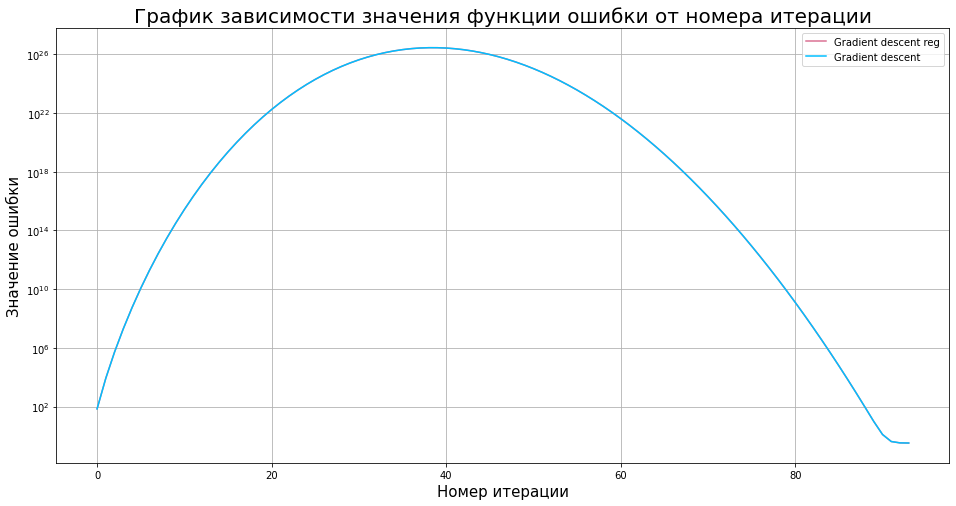

In [261]:
plt.figure(figsize=(16,8))
plt.title('График зависимости значения функции ошибки от номера итерации', size=20)
plt.ylabel('Значение ошибки', size=15)
plt.xlabel('Номер итерации', size=15)

plt.plot(fr_model.loss_history, label='Gradient descent reg', color='palevioletred')
plt.plot(f_model.loss_history, label='Gradient descent', color='deepskyblue')

plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

Тут 2 графика, честно, они просто совпадают.

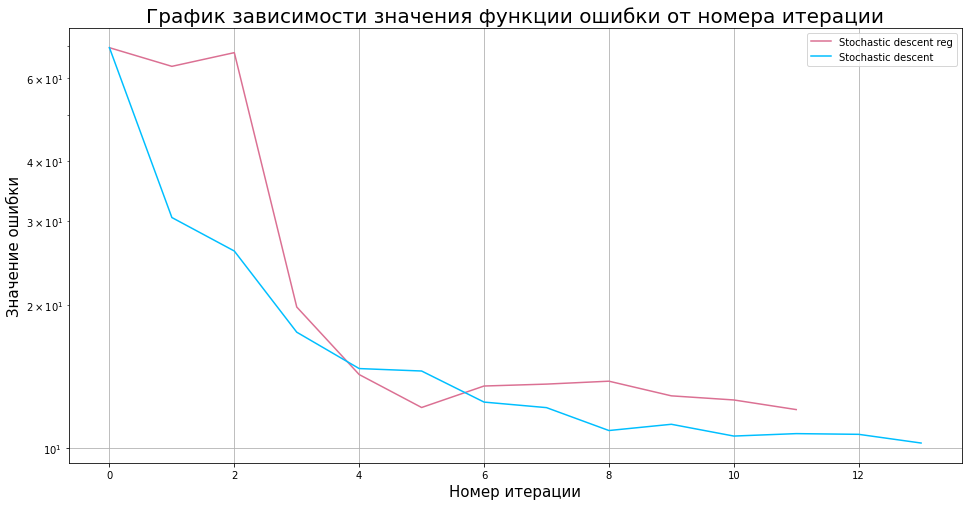

In [262]:
plt.figure(figsize=(16,8))
plt.title('График зависимости значения функции ошибки от номера итерации', size=20)
plt.ylabel('Значение ошибки', size=15)
plt.xlabel('Номер итерации', size=15)

plt.plot(sr_model.loss_history, label='Stochastiс descent reg', color='palevioletred')
plt.plot(s_model.loss_history, label='Stochastiс descent', color='deepskyblue')

plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

КрАсИвО

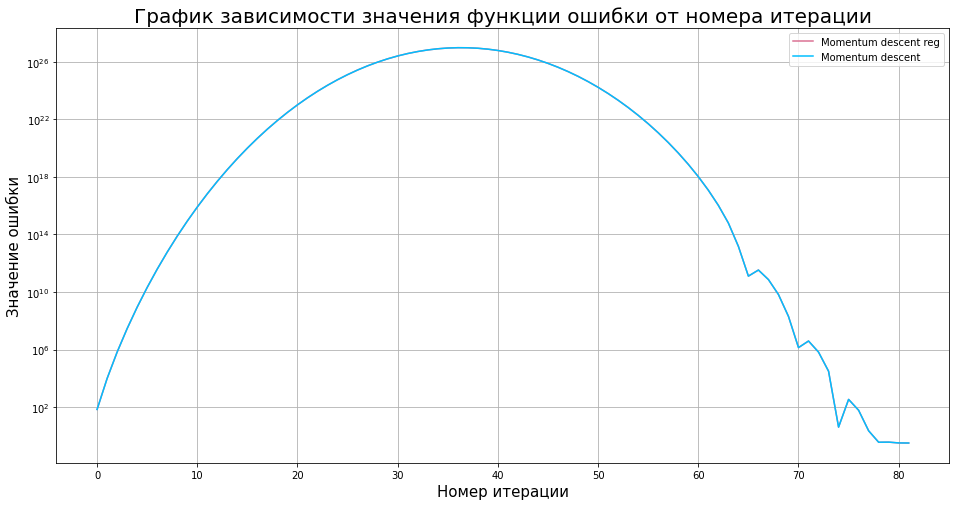

In [264]:
plt.figure(figsize=(16,8))
plt.title('График зависимости значения функции ошибки от номера итерации', size=20)
plt.ylabel('Значение ошибки', size=15)
plt.xlabel('Номер итерации', size=15)

plt.plot(mr_model.loss_history, label='Momentum descent reg', color='palevioletred')
plt.plot(m_model.loss_history, label='Momentum descent', color='deepskyblue')

plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

Да, тут их тоже 2...

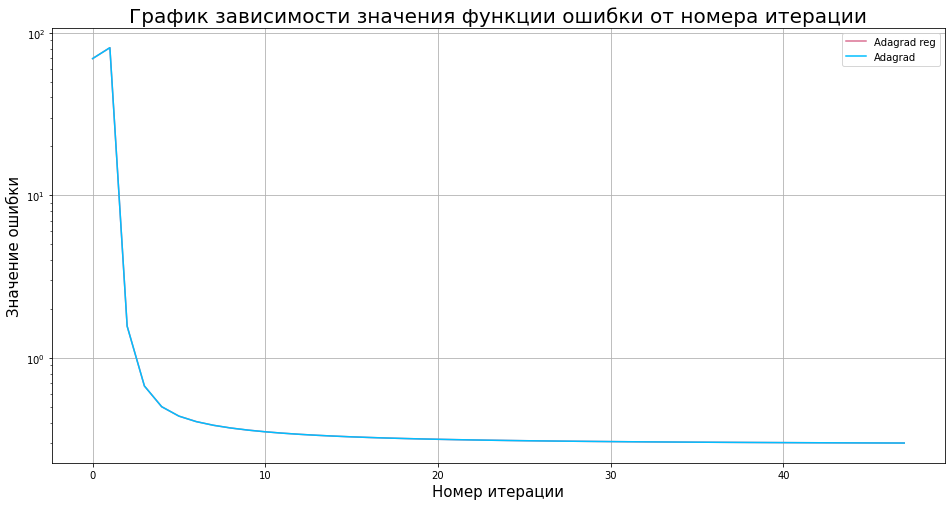

In [266]:
plt.figure(figsize=(16,8))
plt.title('График зависимости значения функции ошибки от номера итерации', size=20)
plt.ylabel('Значение ошибки', size=15)
plt.xlabel('Номер итерации', size=15)

plt.plot(ar_model.loss_history, label='Adagrad reg', color='palevioletred')
plt.plot(a_model.loss_history, label='Adagrad', color='deepskyblue')

plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

И даже тут 2...

Вывод: в данном случае регуляизация никак не влияет на сходимость спуска. График loss_history изменился только для Стохастического спуска только потому что он в целом всегда меняется и для модели без регуляризации. Вооот-с....

Вообще, я думаю так вышло потому что у меня изначально модель была не переобученной с нормальными весами. Как мы знаем, регуляризация нужна для того, чтобы не допустить больших весов - то есть переобучения.

## Задание 8. Бонус — Реализация метода SAG (2 балла)

В качестве бонуса вам будет следующее задание - напишите собственную реализацию стохастического градиентного спуска по методу SAG в файле `utils.py`. Подробнее прочитать про SAG можно [здесь](https://arxiv.org/pdf/1309.2388.pdf).

Сравните свою реализацию метода SAG с обычным полным градиентным спуском на наших данных. Проведите сравнение аналогично заданию 5. Что вы можете сказать про сходимость этого метода?


In [20]:
class StochasticAverageGradient(BaseDescent):
    def __init__(self, w0: np.ndarray, lambda_: float, x_shape: int, s0: float = s0_default, p: float = p_default):
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.w = np.copy(w0)
        self.v = np.zeros((x_shape, w0.shape[0]))  #тут хранятся градиенты
        self.d = 0  #тут хранится текущая сумма градиентов

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        self.w = self.w - self.eta(iteration) * gradient
        return self.eta(iteration) * gradient

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        el = np.random.randint(low=0, high=X.shape[0])
        df = 2 * np.dot(X[el].T, (np.dot(X[el], self.w) - y[el]))
        self.d = self.d - self.v[el] + df
        self.v[el] = df
        return self.d / y.shape[0]

In [22]:
lambdas = np.logspace(1.8, 2.9, 10)

In [27]:
sa_b_l = -3  #я только к этому моменту поняла, что не поняла, зачем я это делаю...
sa_b_e = 1e10
for el in lambdas:
    sa_model = LinearRegression(descent = StochasticAverageGradient(lambda_ = el, x_shape = new_X_train.shape[0], w0 = w0), tolerance = 1e-3)
    sa_model.fit(new_X_train, y_train.values)
    sa_pred = sa_model.predict(new_X_valid)
    cur_e = mean_squared_error(y_valid, sa_pred)
    print("Для lambda =", el, " MSE =", cur_e)
    if cur_e < sa_b_e:
        sa_b_e = cur_e
        sa_b_l = el

print('Лучшая lambda для StochasticAverageGradient =', sa_b_l)

Для lambda = 63.09573444801933  MSE = 68.96219733607602
Для lambda = 83.60306936514644  MSE = 69.02808034127725
Для lambda = 110.77568505097086  MSE = 33.2613067542338
Для lambda = 146.7799267622069  MSE = 31.934308056671995
Для lambda = 194.48624389373614  MSE = 38.313173287104846
Для lambda = 257.6980374514877  MSE = 18.82272833458601
Для lambda = 341.4548873833601  MSE = 24.534804835088558
Для lambda = 452.4343346616744  MSE = 58.95536202145425
Для lambda = 599.4842503189409  MSE = 63.40761903199339
Для lambda = 794.3282347242813  MSE = 416.0112733777787
Лучшая lambda для StochasticAverageGradient = 257.6980374514877


И что это такое... 

In [37]:
sa_model = LinearRegression(descent = StochasticAverageGradient(lambda_ = sa_b_l, x_shape = new_X_train.shape[0], w0 = w0))
sa_model.fit(new_X_train, y_train.values)
sa_pred_te = sa_model.predict(new_X_test)

In [38]:
print("Значение MSE для Gradient descent с наилучшим lambda = %.6f" % mean_squared_error(f_pred_te, y_test))
print("Значение MSE для Stochastic Average Gradient с наилучшим lambda = %.6f" % mean_squared_error(sa_pred_te, y_test))

print("Значение R2 для Gradient descent с наилучшим lambda = %.6f" % R2(y_test, f_pred_te))
print("Значение R2 для Stochastic Average Gradient с наилучшим lambda = %.6f" % R2(y_test, sa_pred_te))


Значение MSE для Gradient descent с наилучшим lambda = 0.333310
Значение MSE для Stochastic Average Gradient с наилучшим lambda = 27.618524
Значение R2 для Gradient descent с наилучшим lambda = 0.737818
Значение R2 для Stochastic Average Gradient с наилучшим lambda = -20.724727


Это немного (нет) расходится с моим представлением о результатах сравнения моделей.

Как я могу это прокомментировать? Не мы такие, жизнь такая...

Да вроде и не просили комментировать. Дальше прокоменчу сходимость.

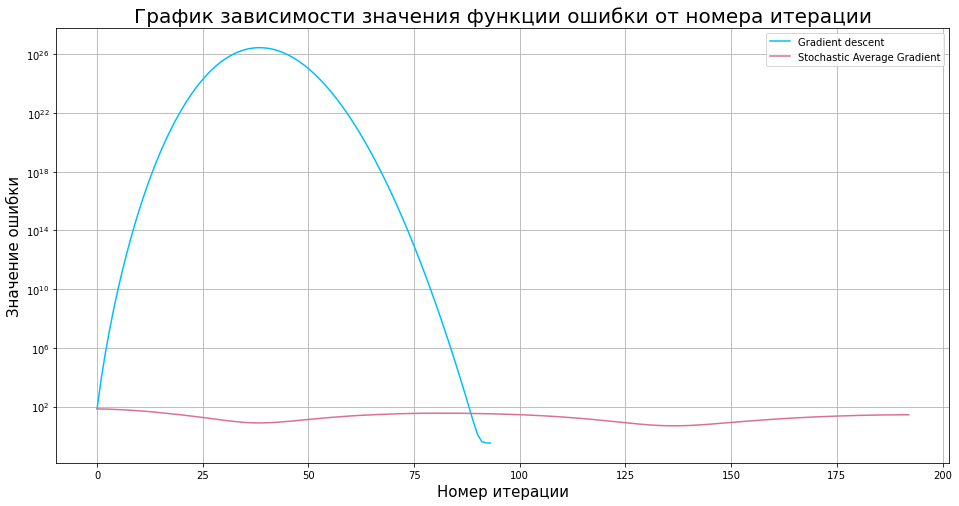

In [39]:
plt.figure(figsize=(16,8))
plt.title('График зависимости значения функции ошибки от номера итерации', size=20)
plt.ylabel('Значение ошибки', size=15)
plt.xlabel('Номер итерации', size=15)

plt.plot(f_model.loss_history, label='Gradient descent', color='deepskyblue')
plt.plot(sa_model.loss_history, label='Stochastic Average Gradient', color='palevioletred')
plt.yscale('log') 
plt.grid()
plt.legend()
plt.show()

Так, ну SAG сходится дольше, чем полный градиентный спуск...

В целом порядок сходимости у стандартного SAG (когда инициализируем $v^0$ градиентами) равен порядку сходимости обычного градиентного спуска. Возможно тут он больше из-за того, что мы изначально инициализируем нулями. Следовательно как минимум до $n$ шага (где $n$ - длина $X$) в $v$ будут пустые строки. И то это в самом лучшем случае. На практике рандом вряд ли выдаст за $n$ вызовов $n$ разных чисел. Таким образом у нас из шага в шаг будет очень слабо меняться $w$. Отсюда такая маленькая скорость сходимости.


*У меня закончились гифки...*

Это я, у которой через пару дней экз по англу (а я даже не знаю, как он выглядит), пытающаяся закрыть еще 100 других дедлайнов:

<img src="https://i.gifer.com/wIM.gif">